In [204]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-



# import autograd / numpy necessities
from autograd import numpy as np
from autograd import grad 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize
# set path to datasets
datapath = '/home/jingyan/Documents/eecs475/final_project/datasets/'


csvname =datapath + 'dermatology.data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# # get input/output pairs

x = (data[:,:-1]).T

y = data[:,-1]
y =np.reshape(y,(1,len(y)))-1

def changeY (y,n,m):
    for i in range(np.size(y)):
        if(y[0][i] == n):
            y[0][i] = m
            
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T
# multiclass softmaax regularized by thre summed length of all normal vectors

lam = 10**-5  # our regularization paramter 
def multiclass_perceptron(w):        
    # pre-compute predictions on all points
    all_evals = model(x,w)
    
    # compute maximum across data points
    a = np.max(all_evals,axis = 0)    

    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)
    
    # add regularizer
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    
    # return average
    return cost/float(np.size(y))

def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history
#Return classification and the probability 
def fusion_rule(x,w):
    a=model(x,w)
    classif=np.argmax(a,axis=0)
    probability=[]
    for i in range(a.shape[1]):
        b=a[:,i]
        percentagetemp=b/np.linalg.norm(b)
        percentage=percentagetemp[classif[i]]
        probability=np.append(probability,percentage)
    return classif,probability



In [215]:
w=np.random.randn(x.shape[0]+1,len(np.unique(y)))**2/100  #(number of atrributes+1 , number of classification )
weight_history,cost_history=gradient_descent(multiclass_perceptron,5e-3,1000,w)
wo=weight_history[-1]
#print(wo,cost_history[-10:])
result=fusion_rule(x,wo)[0]
probability=fusion_rule(x,wo)[1]
print("training model result is:",result)
misclass=0
for i in range(np.size(y)):
    if result[i] != y[0][i]:
#         print(i,"th calssification doesnot match.","detected class:",result[i],"actual class:",y[0][i])
        misclass=misclass+1
print("number of miscalssification:",misclass)

training model result is: [1 0 2 0 2 1 4 2 3 3 0 1 1 0 2 3 1 0 2 4 5 1 4 2 4 0 5 4 1 2 0 1 0 1 2 0 1
 1 0 1 4 2 3 5 1 2 2 3 0 0 4 0 1 2 3 1 5 0 4 0 1 2 0 3 4 0 1 5 2 4 3 1 1 0
 2 4 0 1 1 1 4 0 0 2 0 3 1 1 4 0 2 3 1 4 0 5 1 4 0 1 1 0 3 0 2 0 0 2 4 2 2
 4 1 2 3 0 1 4 5 0 0 1 5 2 4 3 0 0 2 4 4 0 3 1 2 0 1 0 0 2 2 2 1 4 3 1 1 0
 0 0 4 2 1 2 1 1 3 1 2 5 1 0 0 2 3 2 2 0 0 0 2 0 0 1 2 2 0 0 0 0 5 1 1 1 1
 0 2 2 2 0 0 1 2 1 1 1 4 4 4 4 4 0 0 0 0 0 0 0 2 2 2 2 2 2 3 3 3 3 4 4 4 4
 4 4 4 1 1 1 1 0 0 0 0 0 0 5 5 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 3 1 3 3 3 1 5
 5 5 3 3 3 0 0 0 0 0 1 1 3 3 3 0 0 1 3 1 2 2 2 2 0 0 0 0 4 4 4 4 4 2 2 2 3
 0 0 3 3 3 0 0 0 2 2 2 2 2 0 0 0 0 3 3 0 0 3 2 2 1 0 0 3 3 4 4 0 0 4 4 2 0
 4 4 5 5 3 1 5 5 5 0 0 0 4 4 0 0 0 0 1 1 3 3 2 2 0]
number of miscalssification: 6


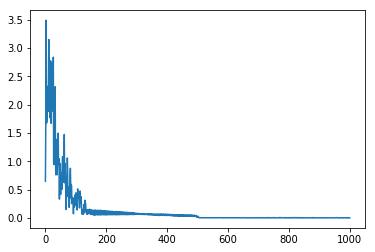

[0.003820523131235541, 0.007731870606135492, 0.003530170976630371, 0.0055660243473609535, 0.002054812710909683, 0.00273895973608458, 0.002682438437344741, 0.0051999309004577094, 0.002190966385927023, 0.0025101123175035388]


In [216]:
plt.plot(cost_history)
plt.show()
print(cost_history[-10:])
